In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

X_new, y_new = make_circles(n_samples=500, factor=0.5, noise=0.08, random_state=42)

X_scaled = X_new * 2

df = pd.DataFrame(X_scaled, columns=['X', 'Y'])
df['class'] = y_new

In [3]:
df.head()

,X,Y,class
0,-0.938444,0.465593,1
1,-0.212316,1.996983,0
2,-0.908841,0.048839,1
3,-1.270348,-1.284070,0
4,-1.607990,1.296679,0


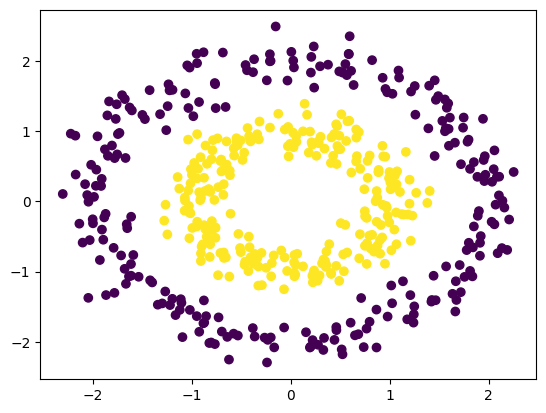

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Set parameters to 0
model.get_weights()

[array([[ 0.00890225,  0.03882957, -0.04903364, -0.45735466,  0.34783286,
         -0.6262229 ,  0.12337697, -0.3737982 , -0.26170126, -0.5740652 ],
        [-0.19956112,  0.37934977, -0.10274106,  0.45009357, -0.26446962,
          0.3836128 ,  0.3699568 , -0.25270492,  0.11018318,  0.26808006]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.63091964],
        [-0.1606192 ],
        [-0.23884585],
        [ 0.31349224],
        [ 0.4998415 ],
        [-0.04500031],
        [-0.43652737],
        [ 0.22094816],
        [-0.35251674],
        [-0.34797537]], dtype=float32),
 array([0.], dtype=float32)]

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5167 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6937
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5009 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6943
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6949
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4813 - loss: 0.6939 - val_accuracy: 0.4500 - val_loss: 0.6950
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5495 - loss: 0.6916 - val_accuracy: 0.4500 - val_loss: 0.6961
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5109 - loss: 0.6929 - val_accuracy: 0.4500 - val_loss: 0.6956
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5483 - loss: 0.6913 - val_accuracy: 0.4500 - val_loss: 0.6960
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4843 - loss: 0.6944 - val_accuracy: 0.4500 -

In [15]:
model.get_weights()

[array([[0.10214585, 0.10214585, 0.10214585, 0.10214585, 0.10214585,
         0.10214585, 0.10214585, 0.10214585, 0.10214585, 0.10214585],
        [0.08643194, 0.08643194, 0.08643194, 0.08643194, 0.08643194,
         0.08643194, 0.08643194, 0.08643194, 0.08643194, 0.08643194]],
       dtype=float32),
 array([-0.03282971, -0.03282971, -0.03282971, -0.03282971, -0.03282971,
        -0.03282971, -0.03282971, -0.03282971, -0.03282971, -0.03282971],
       dtype=float32),
 array([[-0.01230143],
        [-0.01230143],
        [-0.01230143],
        [-0.01230143],
        [-0.01230143],
        [-0.01230143],
        [-0.01230143],
        [-0.01230143],
        [-0.01230143],
        [-0.01230143]], dtype=float32),
 array([-0.0080872], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step


<Axes: >

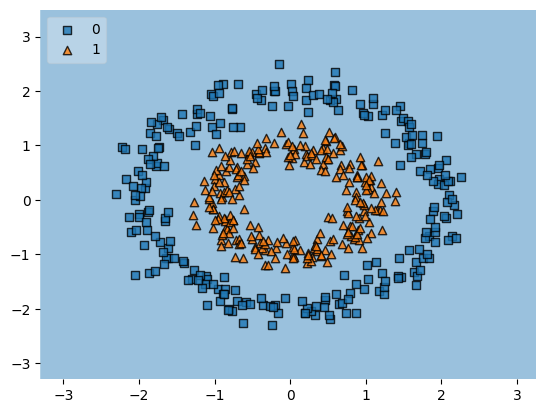

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)